In [0]:
!pip install sentencepiece

import seaborn as sns
from fastai.text import *
from fastai.text.transform import Vocab

sns.set()

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [0]:
# Language model data
path = Path('drive/My Drive/data')
path.ls()

In [4]:
df = pd.read_json(path/'yahoo-movie-reviews.json')
df.head()

,date,movieName,movieUrl,rating,text,title,url
0,2010年9月5日 17時55分,おくりびと,http://movies.yahoo.co.jp/movie/%E3%81%8A%E3%8...,3,を見れたのが意外な収穫でした♡\n\n邦画もたまには良いかな。,♡ヒロスエのパンツ♡,http://movies.yahoo.co.jp/movie/%E3%81%8A%E3%8...
1,2008年9月30日 10時03分,おくりびと,http://movies.yahoo.co.jp/movie/%E3%81%8A%E3%8...,2,映画館入口のパネルに『どの年齢で見るかでも感じ方が違う』みたいなウド鈴木のコメントを載せてあ...,(ﾟ-ﾟ)うーん,http://movies.yahoo.co.jp/movie/%E3%81%8A%E3%8...
2,2008年10月17日 2時23分,おくりびと,http://movies.yahoo.co.jp/movie/%E3%81%8A%E3%8...,5,終盤の、大悟が無くなった父親に最後の化粧を施すシーンが\n印象的である。カメラは、大悟・父・...,“名作”と呼ばれる作品になるでしょう。,http://movies.yahoo.co.jp/movie/%E3%81%8A%E3%8...
3,2008年9月15日 13時29分,おくりびと,http://movies.yahoo.co.jp/movie/%E3%81%8A%E3%8...,5,予告を始めて観た時から、強烈に心に残り、公開が待ち遠しかったんだよね。\nそしたら、ちょっと...,“死”を見つめる事で、“生”が際立つ,http://movies.yahoo.co.jp/movie/%E3%81%8A%E3%8...
4,2008年10月26日 22時49分,おくりびと,http://movies.yahoo.co.jp/movie/%E3%81%8A%E3%8...,4,とても「良い映画」でした。涙も沢山出ました。酒田の風景がとても素朴かつ美しく、日本でもまだこ...,“良い映画”です,http://movies.yahoo.co.jp/movie/%E3%81%8A%E3%8...


In [5]:
len(df)

91196

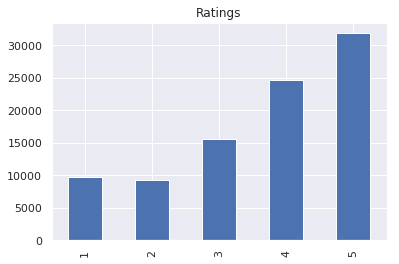

In [6]:
ratings = df['rating'].value_counts()
ratings = ratings.sort_index()
ratings.plot.bar(title='Ratings')

In [7]:
movies = df['movieName'].value_counts()
movies

踊る大捜査線　THE MOVIE 3　ヤツらを解放せよ！      2453
トランスフォーマー                         2399
バベル                               2376
おくりびと                             2310
レッドクリフ Part I                     2154
ヱヴァンゲリヲン新劇場版：破                    2063
コクリコ坂から                           2039
HERO                              1995
ゼロ・グラビティ                          1919
ミスト                               1918
クローバーフィールド／HAKAISHA               1902
スパイダーマン3                          1870
パッチギ！　LOVE&PEACE                  1857
インディ・ジョーンズ／クリスタル・スカルの王国           1827
パイレーツ・オブ・カリビアン／デッドマンズ・チェスト        1803
ダ・ヴィンチ・コード                        1780
悪人                                1748
GODZILLA　ゴジラ                      1735
インセプション                           1733
ターミネーター4                          1730
ALWAYS　続・三丁目の夕日                   1729
2012                              1710
300 ＜スリーハンドレッド＞                   1703
アリス・イン・ワンダーランド                    1703
るろうに剣心                            1693
DEATH NOTE　デスノート　the Last

In [8]:
group = df[['movieName', 'rating']].groupby('movieName').mean()
group.sort_values(by='rating', ascending=False)

,rating
movieName,
ショーシャンクの空に,4.595559
ヱヴァンゲリヲン新劇場版：破,4.473582
おくりびと,4.342424
ワイルド・スピード SKY MISSION,4.299163
それでもボクはやってない,4.275949
シンデレラ,4.264516
ベイマックス,4.229252
ミッション：インポッシブル／ゴースト・プロトコル,4.220000
マイ・インターン,4.176871


In [0]:
df['length'] = df['text'].apply(len)

In [10]:
stats = df[['rating', 'length']].groupby('rating').describe()
stats.head()

length                                                          
          count        mean         std  min    25%    50%    75%     max
rating                                                                   
1        9803.0  245.189636  285.485951  1.0   68.0  151.0  310.0  2104.0
2        9288.0  324.295112  317.731180  1.0  125.0  224.0  408.0  2093.0
3       15652.0  344.414260  318.670085  1.0  137.0  246.0  437.0  2067.0
4       24604.0  365.268615  334.555634  1.0  146.0  261.0  463.0  2317.0
5       31849.0  343.936262  358.901383  0.0  115.0  225.0  429.0  2242.0

In [11]:
positive = df[(df['rating'] == 5) & (df['length'] > 100)].copy()
positive['rating'] = 'positive'
pos = positive.sample(5000)
len(pos)

5000

In [12]:
negative = df[(df['rating'] == 1) & (df['length'] > 100)].copy()
negative['rating'] = 'negative'
neg = negative.sample(5000)
len(neg)

5000

In [13]:
sample = pd.concat([pos, neg])
sample = sample[['text', 'rating']]
# sample = sample.replace(r'\n',' ', regex=True)
sample.head()

,text,rating
14196,伏線張りまくりのストーリーを圧倒的な映像と音楽で\n表現しています。ほんとよく作ったなーと思...,positive
56487,アン・ハサウェイの経営する会社のオフィスがとーっても\n素敵なインテリアで見ててうっとりしち...,positive
15099,俺的には最初はちょっと理解できない所があり\nこれ結構難しい系の映画かなと思いました。\nで...,positive
62416,ストーリーはこれ見る前にすでに旧作を見ようが序しか見てなかろうが大方予想できます。\nなぜこ...,positive
15215,いったいどんな映画なのか。。。\nと、楽しみに見に行った。\n\nいやーー\nこれこれ。\n...,positive


In [0]:
sample.to_csv(path/'yahoo-movie-reviews.csv', index=False)

In [0]:
class SentencepieceTokenizer(BaseTokenizer):
    def __init__(self, lang: str='ja'):
        try:
            import sentencepiece as spm  
        except ImportError:
            raise Exception('sentencepiece module is missing: run `pip install sentencepiece`')
        self.tok = spm.SentencePieceProcessor()
        self.tok.Load(str(path/'spm.model'))
    
    def tokenizer(self, t:str) -> List[str]:
        return self.tok.EncodeAsPieces(t)

In [16]:
sent = SentencepieceTokenizer()
sent.tokenizer('ムービークリニックにようこそ。')

['▁', 'ムービー', 'クリ', 'ニック', 'に', 'よう', 'こそ', '。']

In [0]:
tok = Tokenizer(tok_func=SentencepieceTokenizer)
vocab = Vocab(pickle.load(open(path/'models'/'itos_wt-2.pkl', 'rb')))

In [0]:
# Language model data
data_lm = TextLMDataBunch.from_csv(path, 'yahoo-movie-reviews.csv', tokenizer=tok, vocab=vocab, text_cols='text', label_cols="rating")

In [0]:
# Classifier model data
data_clas = TextClasDataBunch.from_csv(path, 'yahoo-movie-reviews.csv', tokenizer=tok, vocab=data_lm.train_ds.vocab, text_cols='text', label_cols="rating", bs=32)

In [20]:
data_lm.show_batch()

idx,text
0,ように イ ・ ビ ョ ン ホン が <unk> の にも 腹 が 立った 。 見る ん じゃ なかった 。 ▁ 木村 拓 哉 と 松 たか 子の コンビ だけ は 良 かった 。 これ だけで 救 われる かな 。 いずれ に しても お 金 払 って 見 <unk> 映画 <unk> <unk> 。 ▁ xxbos ▁ <unk> <unk> ことが すべて で 新たに 情報 <unk> ない 、 <unk> 盾 <unk> <unk>
1,感 動 ▁ 見 <unk> 後に は 、 ▁ <unk> 観 まで も を 深く 考え させ られる 。 ▁ <unk> <unk> 映画 に出 会 えて <unk> 良 かった 。 ▁ <unk> <unk> 即 買 です ! ▁ xxbos ▁ さ て 、 配給 が タイム <unk> で <unk> だけ 監督 と 日本 らしい 映画 が 作 れた の であろう 。 ▁ まず 、 前作 に比べて お 金 が <unk>
2,▁ xxbos ▁ <unk> 情報 <unk> 時には テン ション 上がり ま <unk> 、 <unk> も 毎日 見る ほど <unk> に しており 、 今 年 の ベスト 映画 <unk> <unk> で 劇場 に 向かい <unk> が 、 <unk> から 言う と 実 に 残 念 な 作品 で した 。 ▁ 私 が 物 心 ついた 頃 の <unk> 映画 と <unk> 「 <unk> <unk> シリーズ 」 であり 、 幼少 時に
3,を <unk> 心 の や る せ な さ <unk> に 泣 いた の であった 。 ▁ これは 、 <unk> <unk> 作 法 <unk> <unk> 映画 だった の だ 。 ▁本 木 雅 弘 演 <unk> 「 納 <unk> 師 」 の 所 作 の 美 <unk> と言った ら 、 <unk> <unk> 能 舞台 <unk> を 観 <unk> の 如 き 感 があった 。 ▁ 無 論 、 感 動
4,前作 の 1 ～ 3 を見て 知識 をつけ また 4 を 観 たい <unk> ます !」 ▁ xxbos ▁ もう 見 <unk> た 感 のある 破 滅 的 <unk> <unk> と ダ メ な 映画 を 盛り 上げる 為 だけ に 死 んで いく 人 達 。 ▁この 手 の 映画 だと は 思 って <unk> したが ここ まで ストーリー が スカ スカ だと は 思い <unk> で した 。


In [0]:
data_lm.save('data_lm_export.pkl')
data_clas.save('data_clas_export.pkl')

In [0]:
data_lm = load_data(path, 'data_lm_export.pkl')

In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, pretrained_fnames=('qrnn_wt-2', 'itos_wt-2'), drop_mult=0.5)

In [24]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,4.590764,4.487607,0.243777,1:20:02


In [25]:
learn.unfreeze()
learn.fit_one_cycle(1, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,4.272850,4.243399,0.272256,2:06:08


In [0]:
learn.save_encoder('ft_enc')

In [27]:
learn.predict("この映画はなかなか", n_words=10)

'この映画はなかなか <unk> 物語 を <unk> しても 、 よく 原作 に 驚'

In [28]:
classifier = text_classifier_learner(data_clas, AWD_LSTM, pretrained=False, drop_mult=0.5)
classifier.load_pretrained(wgts_fname=path/'models'/'qrnn_wt-2.pth', itos_fname=path/'models'/'itos_wt-2.pkl', strict=False) 
classifier.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (7999 items)
x: TextList
▁ xxbos ▁「 面 白 かった 。 」 と 映画 が <unk> から 素 直 に <unk> ことができ <unk> 。 人に 面 白い 映画 として 勧め られる 映画 だ <unk> ます 。 <unk> が いい です 。 <unk> の <unk> ではなく <unk> オリジナル <unk> <unk> しょう か 。 よく 練 り こ まれ て る な と 感じ <unk> 。 しかし 、 その 分 、 話 が 複雑 になっている の で 、 見 ている 間 は 頭 フル 回転 って 感じ です 。 前半 の 説明 が <unk> ち 大 事 になって <unk> ます の で 、 <unk> 頭 に 入れ とき ま しょう 。 後半 は <unk> 的な 映像 と アクション 、 また 、 夢 に入って 、 また 入 って ・ ・ ・ と 息 つく <unk> <unk> エンディング という 感じ <unk> 、 長い 上映 時間 の 割り に <unk> 感じ <unk> 。 ▁ 映像 に関して です が これ また 迫 <unk> あ って いい 。 夢 <unk> 意味 の 分 から ないこと の オン <unk> <unk> <unk> 新 鮮 。 それが 夢 の中 と 理解 して 見 ている の で 自然 と <unk> る ことができ ます 。 b d や <unk> <unk> <unk> ら じ <unk> り <unk> み たい ! と 思 える ような 映像 です 。 ▁ 少し 残 念 だった の は 、 <unk> の ディ カ プリ オ か <unk> れ <unk> 。 個人 的には 好きな 俳優 です し 、 <unk> の 映画 でも 主人公 の 苦 悩 を よく 表現 されて た とは 思い ます が 、 <unk> ど <unk> で 見 たこと ある ような 感じ が して 、 <unk> 残 念 で した 。 ▁ とう とう 分 から なかった の は 、 ネット でも よく 質問 され <unk> が 最後 ら へ ん に サイト ー が <unk

In [29]:
classifier.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.577836,0.508297,0.756122,1:00:52


In [30]:
classifier.freeze_to(-2)
classifier.fit_one_cycle(1, slice(5e-3/2., 5e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.429069,0.360367,0.837581,1:10:35


In [0]:
classifier.save('chckpoint')

In [0]:
classifier.load('chckpoint');

In [0]:
interp = ClassificationInterpretation.from_learner(classifier)

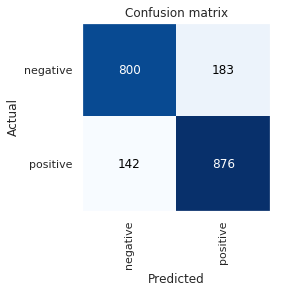

In [34]:
interp.plot_confusion_matrix()

In [35]:
classifier.predict("すごく面白い映画です。")

(Category positive, tensor(1), tensor([3.5251e-05, 9.9996e-01]))

In [36]:
classifier.predict("この映画好きじゃない。")

(Category negative, tensor(0), tensor([0.9190, 0.0810]))

In [37]:
txt_ci = TextClassificationInterpretation.from_learner(classifier)
txt_ci.show_top_losses(10)

Text,Prediction,Actual,Loss,Probability
▁ xxbos ▁ か ぐ や 姫 が 、 地上 に 降り <unk> 、 地上 に 強く <unk> れた という ” 罪 ” に対する ” 罰 ” だった 。 という 映画 だった んだ <unk> 、 <unk> 、 罪 でも 罰 でも なかった ん <unk> かな 、 <unk> <unk> 。 地上 に 降り たい と 強く 願 った から 、 それが かな え られた 。 ということ <unk> かな 、 と 。,positive,positive,5.30,1.00
▁ xxbos ▁ あまり に 評価 が高い の で 、 ▁ <unk> 注意 <unk> 起 の <unk> <unk> させて も らい ます 。 ▁ 参考 までに 、 お 読み 下 さい 。 ▁ 本作 は 、 おそらく 中 高 生 向け ( オン リー ) に 作られた 作品 だ <unk> ます 。 ▁ <unk> 、 私 のような 中 年 <unk> じ さん 等 では 、 ▁ <unk> <unk> に た,positive,negative,4.89,0.01
▁ xxbos ▁この 映画 を 観 ている <unk> 、 <unk> は 一つ だけ な の に 小さな 事実 を <unk> ると 、 別の <unk> を作り 上げ てしまう という 裁判 の <unk> 点 を 知 り <unk> 。 ▁「 <unk> 」「 被害者 」 それぞれ 別の <unk> から 見る と 、 <unk> <unk> な の だろう と 感じ る 。 ▁ そして それぞれ が <unk> に 自分の 訴え て <unk> <unk> て,negative,positive,4.77,0.01
▁ xxbos ▁ アメリカ は ほん と <unk> 映画 好き です ね <unk> 。 ▁ ニューヨーク = <unk> って 考え方 も あい かわ らず で 。 他にも 国 は ある <unk> <unk> ね 。 ▁ <unk> は 円 谷 の ウルトラ <unk> <unk> まだ 高い ように 思い ます 。 ▁ 怪 しい <unk> と 真 夜 中に 突然 大量 に入る 投票 も 合わせて 、 もう い <unk> <unk> ? って,positive,negative,4.22,0.01
▁ xxbos ▁「 <unk> 大な 時間 と 手 間 <unk> 」 が テーマ になっている ような 気 が し ます 。 ▁ そんな 事 <unk> で 観 <unk> どう <unk> と ・ ・ ・ 。 ▁ 観 て 楽 しい 、 感 動 するという の が 基本 だと した ら どう なん だろう ? ▁ そう いう <unk> 方 もある か <unk> れ <unk> が 。 ▁「 す ご い 有名な,positive,negative,4.00,0.02
▁ xxbos ▁ 個人 の 見解 です が はっきり 言 って つ ま らなかった <unk> ます 。 <unk> が 意味 無く ご ちゃ ご ちゃ し すぎ だと 感じ <unk> 。 ▁ <unk> なら 、 この ご ちゃ ご ちゃ 感 の一つ 一つ が 意味 を な して ▁ 違 和 感 無く 、 <unk> に <unk> <unk> 快 な 所 が この <unk> 良い ▁ 点 な の に,positive,negative,3.78,0.02
▁ xxbos ▁ 原作 未 読 で 、 観 て き <unk> 。 本 を <unk> 自由 ・ ・ ・ <unk> 考え たこと は あり <unk> で した 。 ▁ 色 々 な <unk> が <unk> <unk> 決 ま ってしまう 怖 さ 、 <unk> 政治 に 関心 を 持 た なければ 、 映画 のような 時代 が <unk> <unk> 、 歴史 さえ <unk> られ てしまう <unk> 、 考え させ られ <unk>,positive,positive,3.62,0.97
▁ xxbos ▁ 前 <unk> ( 作られた もの ? ) 、 期待 感 が 強 かった だけ に 、 が <unk> り 。 <unk> の シリーズ 中 ▁ 最低 <unk> ではない で しょう か 。 u f o ? も ▁ <unk> も 陳 腐 。 シナリオ 自体 の 失敗 では ▁xx rep ▁4 ▁ ・ ▁ 。 あまり 退 屈 で ▁ <unk> 寝 てしまい <unk> 。 期待 が,negative,negative,3.33,0.96
▁ xxbos ▁ い や ー 、 <unk> ク ▁ 映画 が 平均 4 以上 って 、 ここ の <unk> の レベル の 低 さ に び <unk> り だ ね 。 ▁ <unk> 爆発 して 車 で ビュー ンド <unk> バ <unk> って や って れば 楽 しい んだ ね 。 ▁ アクション 映画 観 て 寝 た の <unk> <unk> e <unk> ed 2 以来 。,negative,negative,3.31,0.96
▁ xxbos ▁ <unk> める わけ でも <unk> す わけ で もない が 、 これは <unk> 楽 映画 ではない 。 ▁ <unk> 真 面 目 。 ▁ 真 剣 に 問題 <unk> して 、 真 剣 に 訴え <unk> している 映画 。 ▁ 面 白い と か 面 白 <unk> と か 言う の は <unk> ナン <unk> だ 。 ▁ これが <unk> です 、 と ▁ あり あり と,negative,positive,3.30,0.04
